In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
td= pd.read_csv("Data_Train_lyst6947.csv")

In [3]:
td.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
td.shape

(10683, 11)

In [5]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10683 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10683 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
td.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
td.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
td["Journey_Day"] = pd.to_datetime(td.Date_of_Journey, format= "%d/%m/%Y").dt.day

td["Journey_month"] = pd.to_datetime(td.Date_of_Journey, format= "%d/%m/%Y").dt.month

td.drop(columns="Date_of_Journey", axis=1, inplace=True)

In [9]:
td["Dep_Hour"] = pd.to_datetime(td.Dep_Time).dt.hour

td["Dep_Minute"] = pd.to_datetime(td.Dep_Time).dt.minute

td.drop(columns="Dep_Time", axis=1, inplace=True)

In [10]:
td["Arrival_Hour"] = pd.to_datetime(td.Arrival_Time).dt.hour

td["Arrival_Minute"] = pd.to_datetime(td.Arrival_Time).dt.minute

td.drop(columns="Arrival_Time", axis=1, inplace=True)

In [11]:
td.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [12]:
duration = list(td["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + "0m"
        else:
            duration[i] = "0h" + duration[i]
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep ="h")[0]))
    duration_mins.append(int(duration[i].split(sep ="m")[0].strip()[-1]))



In [13]:
td["Duration_hours"]= duration_hours
td["Duration_mins"]= duration_mins

In [14]:
td.drop(columns="Duration", axis=1, inplace=True)

In [15]:
td.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,5


In [16]:
td.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

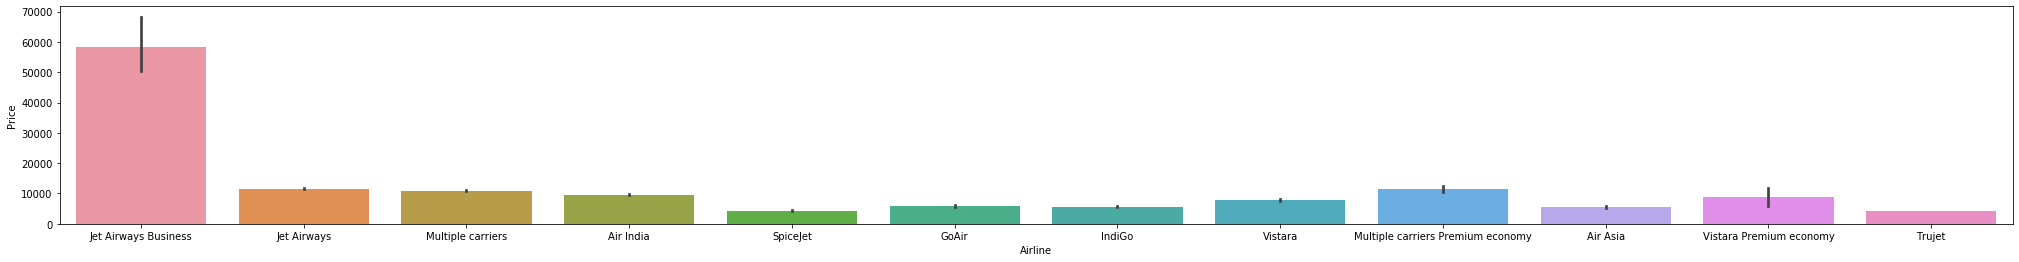

In [17]:
plt.figure(figsize=(35,4))


sns.barplot(y="Price", x="Airline", data=td.sort_values("Price", ascending = False))

In [18]:
Airline = td[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [19]:
td.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

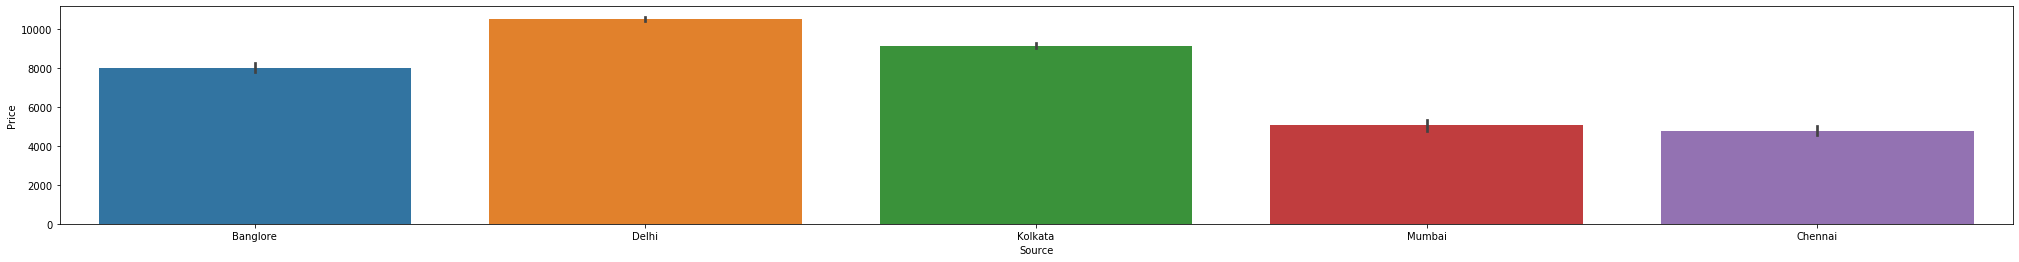

In [20]:
plt.figure(figsize=(35,4))
sns.barplot(x="Source", y="Price", data=td.sort_values("Price", ascending = False))

In [21]:
Source = td[["Source"]]
Source= pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [22]:
td.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [23]:
Destination = td[["Destination"]]
Destination= pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [24]:
td["Route"]

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10683, dtype: object

In [25]:
td.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [26]:
td.Total_Stops.value_counts()

1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [27]:
td.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)

In [28]:
td.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,5
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,5


In [29]:
train_data= pd.concat([td, Airline, Source, Destination], axis=1)

In [48]:
train_data.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [49]:
train_data.head()

,Total_Stops,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,5,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,5,...,0,0,0,0,0,0,0,0,0,1


In [50]:
train_data.shape

(10683, 30)

In [51]:
ted= pd.read_csv("Test_set_lyst5257.csv")

In [52]:
ted.shape

(2671, 10)

In [53]:
ted.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [54]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [55]:
print("Ted Info")
print("-"*75)
print(ted.info())

print()
print()

print("Null_values:")
print("-"*75)
print(ted.isnull().sum())

Ted Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null_values:
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [56]:
ted["Journey_Day"] = pd.to_datetime(ted.Date_of_Journey, format= "%d/%m/%Y").dt.day

ted["Journey_month"] = pd.to_datetime(ted.Date_of_Journey, format= "%d/%m/%Y").dt.month

ted.drop(columns="Date_of_Journey", axis=1, inplace=True)

In [57]:
ted["Dep_Hour"] = pd.to_datetime(ted.Dep_Time).dt.hour

ted["Dep_Minute"] = pd.to_datetime(ted.Dep_Time).dt.minute

ted.drop(columns="Dep_Time", axis=1, inplace=True)

In [58]:
ted["Arrival_Hour"] = pd.to_datetime(ted.Arrival_Time).dt.hour

ted["Arrival_Minute"] = pd.to_datetime(ted.Arrival_Time).dt.minute

ted.drop(columns="Arrival_Time", axis=1, inplace=True)

In [59]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [61]:
x= train_data.loc[:,['Total_Stops','Journey_Day', 'Journey_month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_Day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,5,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,5,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,5,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
y=train_data.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

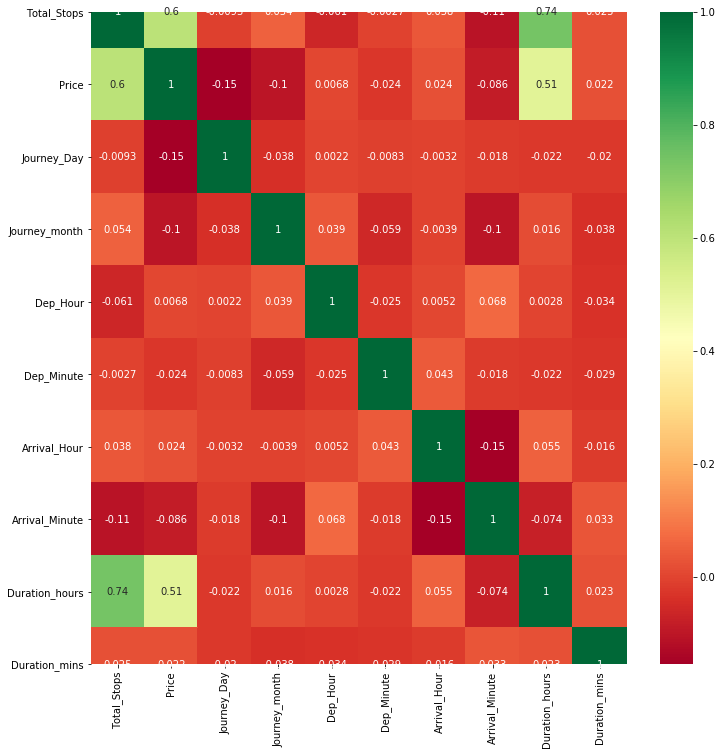

In [68]:
plt.figure(figsize=(12,12))
sns.heatmap(td.corr(), annot=True, cmap= "RdYlGn")

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

C:\Users\Nivedita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [70]:
print(selection.feature_importances_)

[2.33188094e-01 1.48627486e-01 4.77842273e-02 2.58988395e-02
 2.34917167e-02 2.93830534e-02 2.08454417e-02 1.20985979e-01
 9.83445238e-03 1.01098328e-02 1.99954808e-03 2.06624642e-02
 1.25754275e-01 6.81250197e-02 1.63696596e-02 4.30014598e-04
 2.96346091e-03 6.91981274e-05 5.15312458e-03 1.12814360e-04
 2.68768076e-04 1.68154959e-02 3.49745096e-03 8.51309244e-03
 9.87806615e-03 1.63869595e-02 6.89062425e-03 4.92091270e-04
 2.54687505e-02]


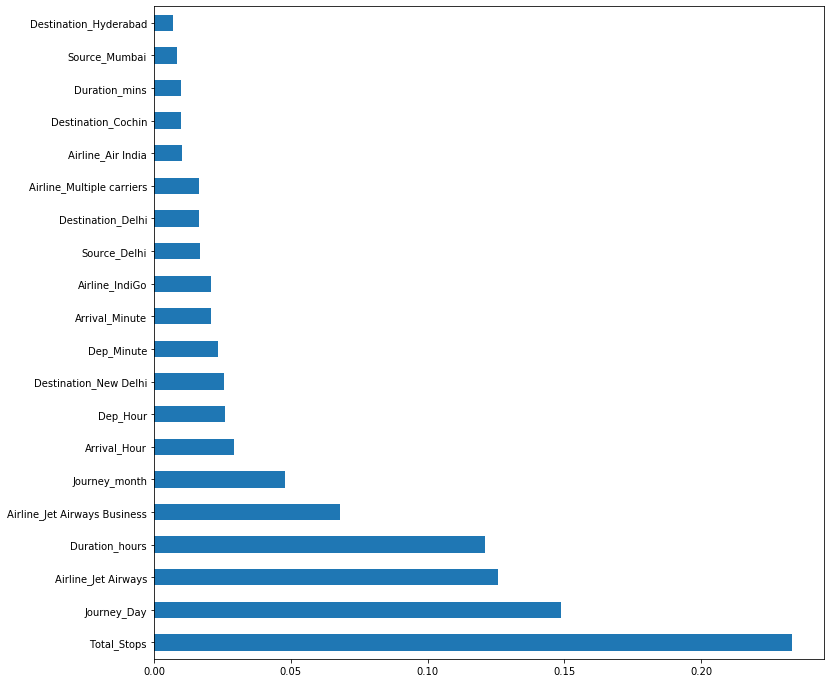

In [71]:
plt.figure(figsize=(12,12))
feat_importances = pd.Series(selection.feature_importances_, index= x.columns)
feat_importances.nlargest(20).plot(kind="barh")

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state =42)

In [74]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8546, 29), (2137, 29), (8546,), (2137,))

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train, y_train)

C:\Users\Nivedita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [76]:
y_pred= rf.predict(x_test)

In [77]:
rf.score(x_train, y_train)

0.9462990678040581

In [78]:
rf.score(x_test, y_test)

0.7820118964601463

In [79]:
from sklearn import metrics

print("MAE : ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE : ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE :  1214.9914739361664
MSE :  4613492.823859535
RMSE :  2147.904286475432


In [80]:
2147.9042/(max(y)-min(y))

0.02762471158669119

In [81]:
metrics.r2_score(y_test,y_pred)

0.7820118964601463

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features=["auto", "sqrt"]
max_depth= [int(x) for x in np.linspace(5,30, num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [86]:
random_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split":min_samples_split,
               "min_samples_leaf":min_samples_leaf,}

In [90]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions= random_grid, scoring="neg_mean_squared_error", n_iter =3, n_jobs=1)

In [91]:
rf_random.fit(x_train,y_train)

C:\Users\Nivedita\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_st...


In [93]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 100,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [94]:
pred = rf_random.predict(x_test)

In [95]:
print("MAE : ", metrics.mean_absolute_error(y_test, pred))
print("MSE : ", metrics.mean_squared_error(y_test, pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE :  1623.8020543830319
MSE :  5814516.290049032
RMSE :  2411.330813067554
